In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_curve,auc


## DATASET LOADING AND UNDERSTANDING

In [7]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Column Descriptions

| Column Name         | Description                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `customerID`        | Unique identifier for each customer.                                        |
| `gender`            | Gender of the customer (Male or Female).                                    |
| `SeniorCitizen`     | Indicates if the customer is a senior citizen (1 = Yes, 0 = No).            |
| `Partner`           | Whether the customer has a partner (Yes or No).                             |
| `Dependents`        | Whether the customer has dependents (Yes or No).                            |
| `tenure`            | Number of months the customer has stayed with the company.                  |
| `PhoneService`      | Whether the customer has phone service (Yes or No).                         |
| `MultipleLines`     | Whether the customer has multiple lines (Yes, No, or No phone service).     |
| `InternetService`   | Type of internet service (DSL, Fiber optic, or No).                         |
| `OnlineSecurity`    | Whether the customer has online security add-on.                            |
| `OnlineBackup`      | Whether the customer has online backup add-on.                              |
| `DeviceProtection`  | Whether the customer has device protection add-on.                          |
| `TechSupport`       | Whether the customer has tech support add-on.                               |
| `StreamingTV`       | Whether the customer has streaming TV.                                      |
| `StreamingMovies`   | Whether the customer has streaming movies.                                  |
| `Contract`          | Type of contract (Month-to-month, One year, Two year).                      |
| `PaperlessBilling`  | Whether the customer uses paperless billing (Yes or No).                    |
| `PaymentMethod`     | Customer’s payment method (e.g., Electronic check, Mailed check).           |
| `MonthlyCharges`    | The amount charged to the customer monthly.                                 |
| `TotalCharges`      | Total amount charged to the customer.                                       |
| `Churn`             | Whether the customer has churned (Yes or No).                               |


## EXPLARATORY DATA ANALYSIS

In [8]:
# Checking the datatypes, size and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Checking if there are any missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Getting the summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#Cecking for duplicates
duplicates = df[df.duplicated()].sum()
duplicates

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [12]:
#Checking for class imbalance
print(df['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [13]:
total = 5174 + 1869
print(f"No churn: {5174/total:.2%}")
print(f"Yes churn: {1869/total:.2%}")

No churn: 73.46%
Yes churn: 26.54%


This dataset is imbalanced because there are more customers who did not churn compared to those who did churn



In [14]:
#Convert the object into numeric and have the mean replace the null vaolues 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

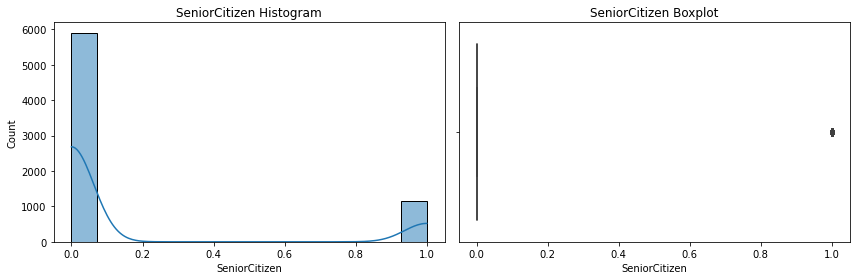

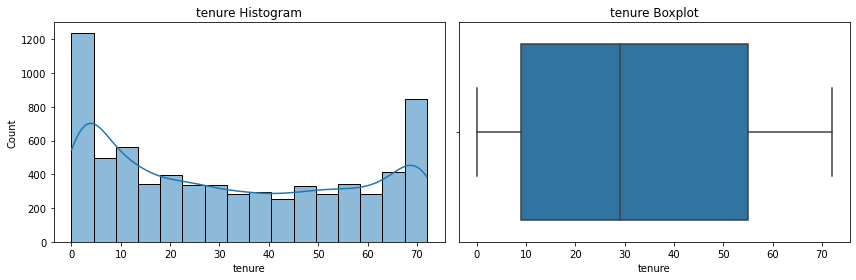

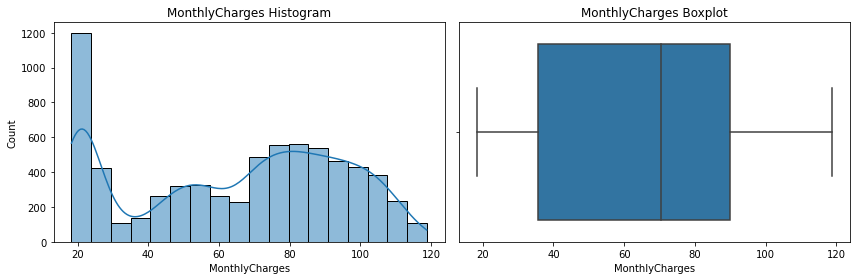

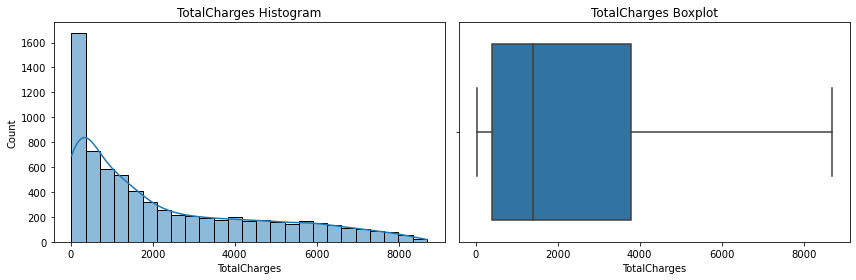

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'{col} Histogram')

    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()

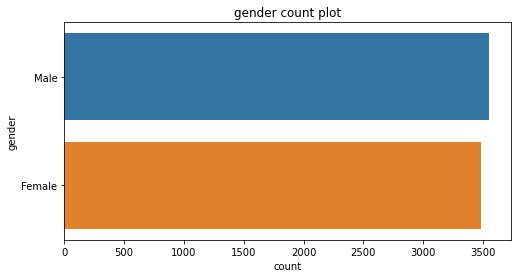

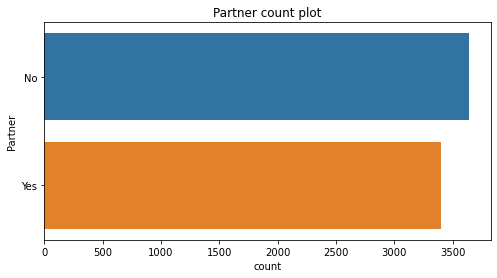

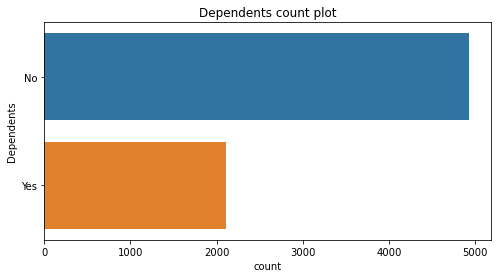

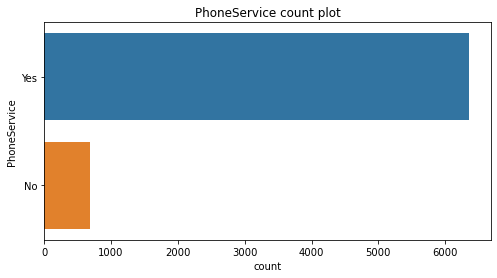

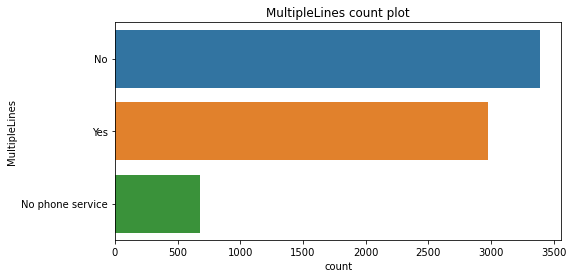

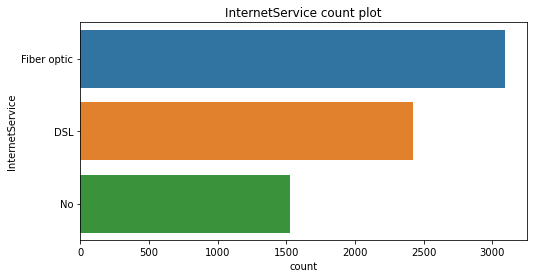

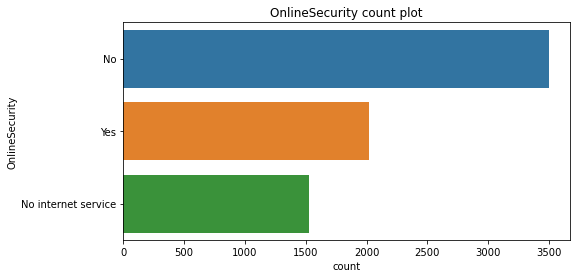

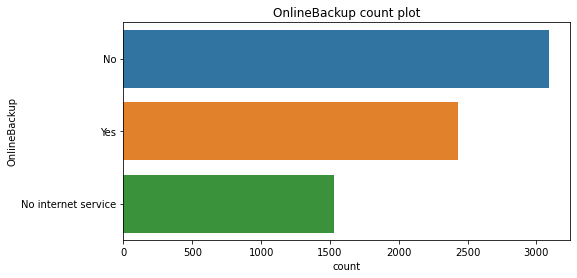

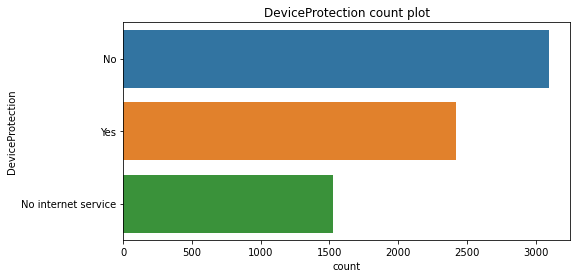

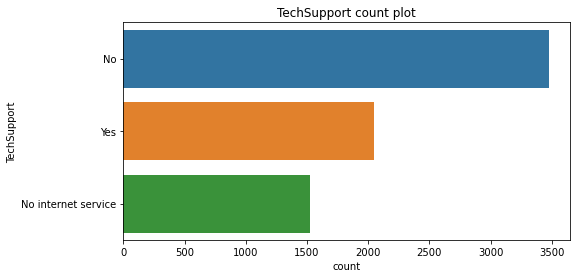

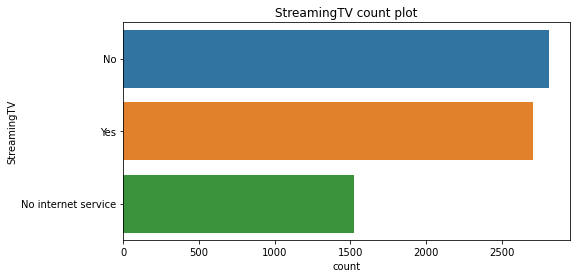

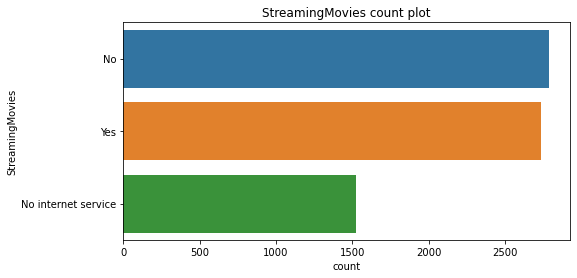

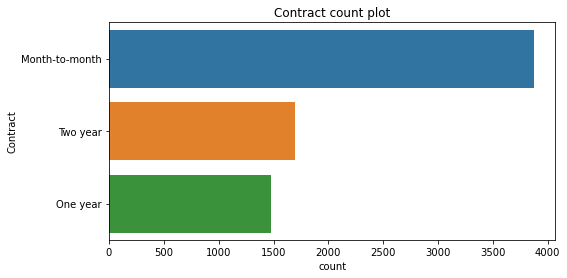

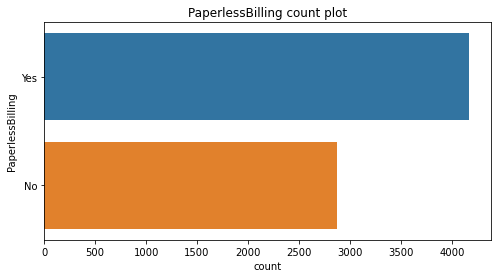

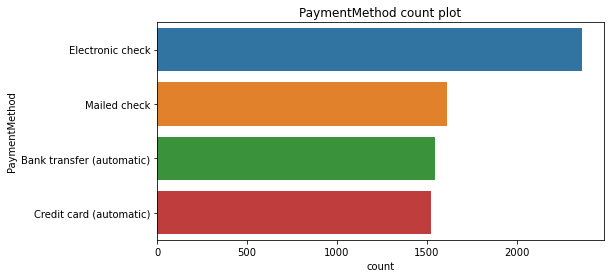

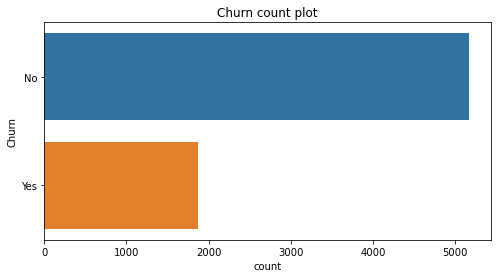

In [16]:
categorical =[col for col in df.select_dtypes(include =['object', 'category']).columns if col != 'customerID']
for coll in categorical:
    plt.figure(figsize = (8,4))
    sns.countplot(y = coll, data = df, order = df[coll].value_counts().index)
    plt.title(f'{coll} count plot')
    plt.show()
    

## DATA CLEANING AND PREPROCESSING

### Convert categorical data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cate_data = df.drop(['MonthlyCharges', 'tenure', 'SeniorCitizen', 'customerID', 'TotalCharges'], axis = 1)
ohe.fit(cate_data)
ohe.transform(cate_data)
data_ohe = pd.DataFrame(data = ohe.transform(cate_data), columns = ohe.get_feature_names_out(cate_data.columns), index = cate_data.index)
data_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [19]:
#I dropped th customerId column
df2 = df[['MonthlyCharges', 'tenure', 'SeniorCitizen', 'customerID', 'TotalCharges']].copy()
df2.drop(columns = 'customerID', inplace = True)

In [20]:
#Combine the numeric dataframe with the encoded one
final = pd.concat([df2, data_ohe], axis = 1)
final

,MonthlyCharges,tenure,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,1,0,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,56.95,34,0,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,53.85,2,0,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,42.30,45,0,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.70,2,0,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,24,0,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,103.20,72,0,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,29.60,11,0,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,74.40,4,1,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## FEATURE ENGINEERING

### Filter Method

### Correlation

In [21]:
corr = final.corr()
corr.head()

,MonthlyCharges,tenure,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
MonthlyCharges,1.000000,0.247900,0.220173,0.650468,-0.014569,0.096848,-0.113890,0.247398,-0.247398,0.490434,...,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437,0.193356
tenure,0.247900,1.000000,0.016567,0.824757,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,...,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852,-0.352229
SeniorCitizen,0.220173,0.016567,1.000000,0.102395,-0.001874,0.016479,-0.211185,0.008576,-0.008576,0.142948,...,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477,0.150889
TotalCharges,0.650468,0.824757,0.102395,1.000000,0.000048,0.318812,0.064535,0.112851,-0.112851,0.468689,...,0.515314,-0.374263,0.519574,0.170491,0.357224,0.157676,0.182581,-0.060412,-0.294125,-0.199428
gender_Male,-0.014569,0.005106,-0.001874,0.000048,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,...,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612


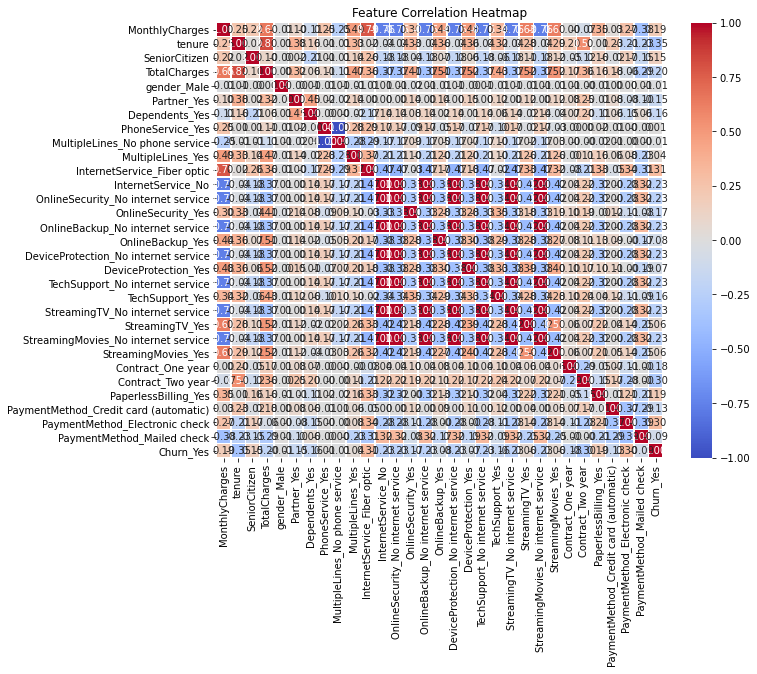

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

There are alot of features making it hard to observe the correlation between them

In [23]:
#Separates features fronm target
X = final.drop(columns = ['Churn_Yes'], axis  = 1)
y = final['Churn_Yes']

In [24]:
#Listing the remaining features with no multicolinearity
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         7043 non-null   float64
 1   tenure                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   float64
 5   Partner_Yes                            7043 non-null   float64
 6   Dependents_Yes                         7043 non-null   float64
 7   PhoneService_Yes                       7043 non-null   float64
 8   MultipleLines_No phone service         7043 non-null   float64
 9   MultipleLines_Yes                      7043 non-null   float64
 10  InternetService_Fiber optic            7043 non-null   float64
 11  Inte

## DATA SPLITTING


In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#Standardization
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## MODEL SELECTION AND TRAINING

#### Simple model

In [26]:
#Choosing the Logistic Regression model
model = LogisticRegression(fit_intercept = False, C =1e12, solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

#### GridSearchCV Model (Hyperparameters)

In [27]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],          
    'solver': ['liblinear']            
}
logreg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
y_pred_tuned 

array([1., 0., 0., ..., 0., 1., 0.])

In [28]:

pd.Series(model.coef_[0], index=X.columns)


MonthlyCharges                           0.002153
tenure                                  -0.055230
SeniorCitizen                            0.180242
TotalCharges                             0.000267
gender_Male                             -0.079036
Partner_Yes                              0.006200
Dependents_Yes                          -0.099991
PhoneService_Yes                        -0.517949
MultipleLines_No phone service           0.227457
MultipleLines_Yes                        0.219258
InternetService_Fiber optic              0.698072
InternetService_No                      -0.128900
OnlineSecurity_No internet service      -0.128900
OnlineSecurity_Yes                      -0.470953
OnlineBackup_No internet service        -0.128900
OnlineBackup_Yes                        -0.213686
DeviceProtection_No internet service    -0.128900
DeviceProtection_Yes                    -0.022876
TechSupport_No internet service         -0.128900
TechSupport_Yes                         -0.335379


In [29]:
pd.Series(tuned_model.coef_[0], index=X.columns)

MonthlyCharges                           0.005432
tenure                                  -0.058150
SeniorCitizen                            0.190188
TotalCharges                             0.000286
gender_Male                             -0.073727
Partner_Yes                             -0.010720
Dependents_Yes                          -0.121106
PhoneService_Yes                        -0.413218
MultipleLines_No phone service           0.239233
MultipleLines_Yes                        0.192711
InternetService_Fiber optic              0.546950
InternetService_No                      -0.112101
OnlineSecurity_No internet service      -0.112101
OnlineSecurity_Yes                      -0.445229
OnlineBackup_No internet service        -0.112101
OnlineBackup_Yes                        -0.207613
DeviceProtection_No internet service    -0.112101
DeviceProtection_Yes                    -0.052732
TechSupport_No internet service         -0.112101
TechSupport_Yes                         -0.341681


### Model Evaluation

### Confusion Matrix

##### Simple Model

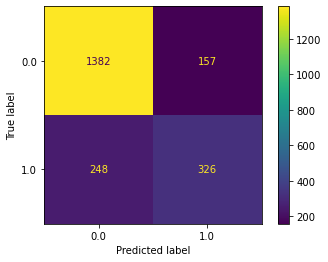

In [30]:
#Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
display.plot()

##### Hyperparameterized model

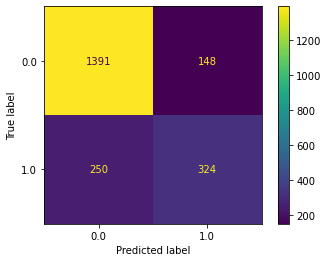

In [31]:
cm = confusion_matrix(y_test, y_pred_tuned)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tuned_model.classes_)
display.plot()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1539
         1.0       0.67      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [33]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1539
         1.0       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113



### ROC curves and AUC

#### Simple model

In [34]:
y_score = model.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.8583359935520827


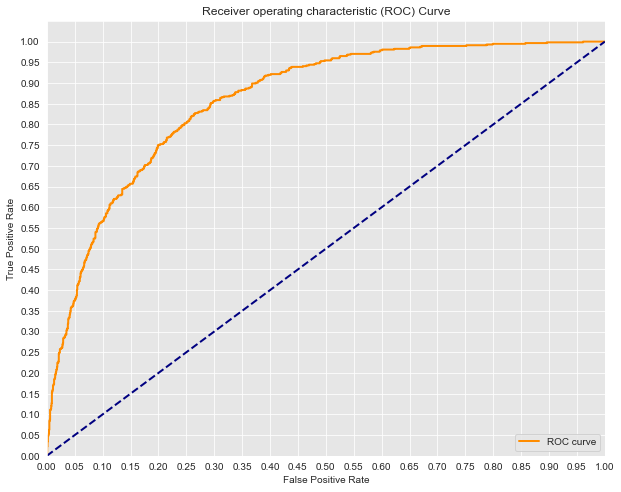

In [35]:
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Hyperparameterized model

In [36]:
y_tune = tuned_model.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.8583359935520827


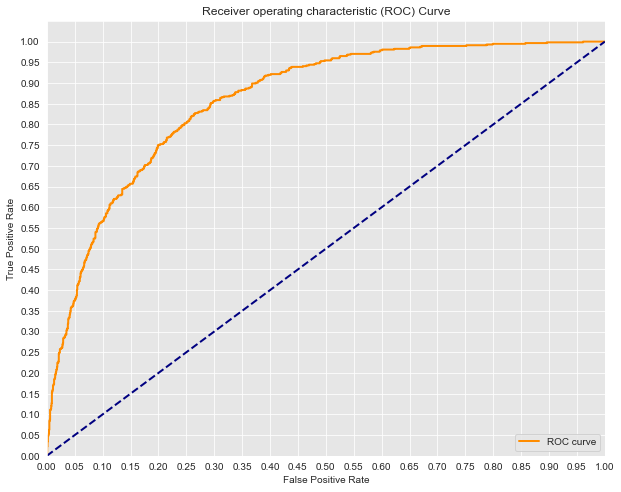

In [37]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Finding the most important features in this model

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10)


TotalCharges                      0.191152
tenure                            0.170285
MonthlyCharges                    0.165679
InternetService_Fiber optic       0.036332
PaymentMethod_Electronic check    0.035919
Contract_Two year                 0.034691
OnlineSecurity_Yes                0.029169
gender_Male                       0.028959
PaperlessBilling_Yes              0.026458
Partner_Yes                       0.024418
dtype: float64

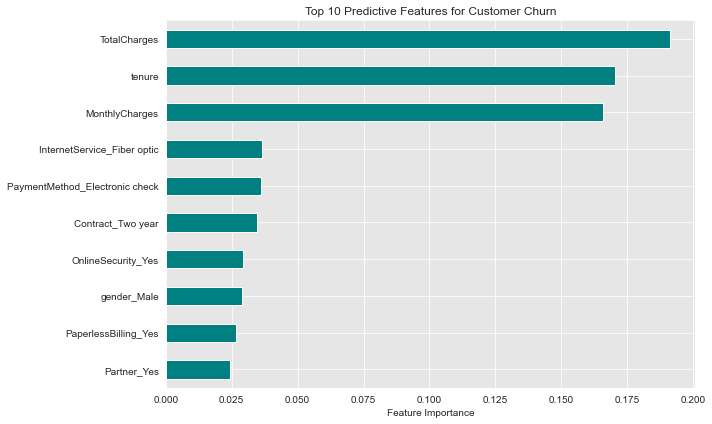

In [41]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title("Top 10 Predictive Features for Customer Churn")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

# FINDINGS AND RECCOMMENDATIONS

## MODELS PERFORMANCE

### Simple Model

- precision - 85%  of the predicted  customers who did churn was actually true while 67% of the predicted customers who did churn was true.
- recall - the model caught 90% of all the actual 'No churn' cases.It also caught 57% of all actual churned cases.
- F1_score - The models f1_score is 87% which strong and balanced performance for the customers cases which did not churn while that for the customers wo churned is 62% which has moderate performance.
- Accuracy - The model has an accuracy of 80%, which means 80% of the predictions were actually correct on the test_set

- The ROC curve is well above the diagonal baseline which indicates that the model is performing better than random guessing

#### Hyperparameterized model

- precision - 85%  of the predicted  customers who did churn was actually true while 69% of the predicted customers who did churn was true.
- recall - the model caught 90% of all the actual 'No churn' cases.It also caught 56% of all actual churned cases.
- F1_score - The models f1_score is 87% which strong and balanced performance for the customers cases which did not churn while that for the customers wo churned is 62% which has moderate performance.
- Accuracy - The model has an accuracy of 81%, which means 801% of the predictions were actually correct on the test_set

- The ROC curve is well above the diagonal baseline which indicates that the model is performing better than random guessing

#### Comparison

- For most values of the False Positive Rate, Hyperparameterized model achieves a higher True Positive Rate than Model 1.

- This suggests that Hyperparameterized model is better at identifying true positives while keeping false positives relatively low.
- Hyperparameterized model's ROC curve appears to be slightly more "bulged" toward the top-left corner compared to Model 1, which typically indicates better performance.

### Top Predictors of Customer Churn

- I computed feature importance using the feature_importances_ attribute of the trained Random Forest model. This score reflects how useful each feature was in reducing node impurity when the model made splits.


Using Random Forest’s feature_importances_:

- Contract type

- Tenure

- Monthly charges

- Payment method (Electronic check in particular)

- Tech support and online security
-  These features play a major role in customer retention and are good levers for business action.



## Predictive Recommendations



Where the model is useful

- Prioritizing retention efforts: helps identify likely churners with ~70% precision.

- Segmenting high-risk customers early, especially in short-tenure or month-to-month contracts.

Where the model isn't fully reliable

- Missing ~44% of actual churn cases (recall = 56%) means some churners won’t be flagged.

- Not ideal as the sole decision-making tool for intervention — needs supplementing with business insights.

#### Input Modification

Encourage long-term contracts:

1. Customers on month-to-month contracts are far more likely to churn.

Incentivize switching to one or two-year contracts (e.g., discounts or loyalty benefits).

2. Provide security & tech support:

Customers without tech support or online security are at higher risk of churning.

Bundle these features with plans or offer free trials to retain customers.

3. Address high billing pain points:

Higher monthly charges correlate with higher churn.

Consider tiered pricing, bill caps, or better communication about value.

4. Monitor payment method behavior:

Churn rates are higher among users of Electronic Check.

Consider prompting for auto-pay or alternative payment methods that show lower churn rates.